In [152]:

import math
import numpy as np
import copy

import torch

# 
# n_input = 4
# n_output = math.log2(n_input)
# batch_size=256
# 
# inputs=[]
# targets=[]
# 
# alpha = 0
# beta = 0
# while alpha<np.pi:    
#     while beta<np.pi:        
#         q_00 = (1-np.power(np.sin(alpha/2),2))*(1-np.power(np.sin(beta/2),2))
#         q_01 = (1-np.power(np.sin(alpha/2),2))*(np.power(np.sin(beta/2),2))
#         q_10 = (np.power(np.sin(alpha/2),2))*(1-np.power(np.sin(beta/2),2))
#         q_11 = (np.power(np.sin(alpha/2),2))*(np.power(np.sin(beta/2),2))
#         # print(alpha,beta,":",[q_00,q_01,q_10,q_11])
#         inputs.append([q_00,q_01,q_10,q_11])
#         targets.append([alpha,beta])
#         beta+=0.05
#     alpha+=0.05
#     beta=0
# 
# 
# t_inputs = torch.tensor(inputs)
# t_targets = torch.tensor(targets)

# print(t_inputs.shape)
# print(t_target.shape)

In [153]:
import math
import numpy as np
import copy
import torch 

# 
# n_input = 8
# n_output = math.log2(n_input)
# batch_size=256
# 
# inputs=[]
# targets=[]
# 
# alpha = 0
# beta = 0
# gamma = 0
# while alpha<np.pi:    
#     while beta<np.pi:
#         while gamma<np.pi:
#             p0=np.power(np.sin(alpha/2),2)
#             p1=np.power(np.sin(beta/2),2)
#             p2=np.power(np.sin(gamma/2),2)
#             q_000 = (1-p0)*(1-p1)*(1-p2)
#             q_001 = (1-p0)*(1-p1)*p2
#             q_010 = (1-p0)*p1*(1-p2)
#             q_011 = (1-p0)*p1*p2
#             q_100 = p0*(1-p1)*(1-p2)
#             q_101 = p0*(1-p1)*p2
#             q_110 = p0*p1*(1-p2)
#             q_111 = p0*p1*p2
#             # print(alpha,beta,":",[q_00,q_01,q_10,q_11])
#             inputs.append([q_000,q_001,q_010,q_011,q_100,q_101,q_110,q_111])            
#             targets.append([alpha,beta,gamma])            
#             gamma+=0.5
#         beta+=0.5
#         gamma=0
#     alpha+=0.5
#     beta=0
# 
# t_inputs = torch.tensor(inputs)
# t_targets = torch.tensor(targets)

In [154]:
import math
import numpy as np
import copy
import torch 
from pathlib import Path

import torch
import numpy as np
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function
import numpy as np 
import math

import shutil
import os
import time
import sys
from pathlib import Path
import functools
from collections import Counter


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# save_path = "./model/"+os.path.basename(sys.argv[0])+"_"+time.strftime("%Y_%m_%d-%H_%M_%S")
save_path = "./model/qc_input"
Path(save_path).mkdir(parents=True, exist_ok=True)

qc_milestones=[1000]
qc_resume_path = "./model/qc_input/quantum_input_best.pth.tar"


n_input = 16
n_output = int(math.log2(n_input))
batch_size=256
gap = 0.5
inputs=[]
targets=[]

alpha = 0
beta = 0
gamma = 0
theta = 0
while alpha<np.pi:    
    while beta<np.pi:
        while gamma<np.pi:
            while theta<np.pi:
                p0=np.power(np.sin(alpha/2),2)
                p1=np.power(np.sin(beta/2),2)
                p2=np.power(np.sin(gamma/2),2)
                p3=np.power(np.sin(theta/2),2)
                q_0000 = (1-p0)*(1-p1)*(1-p2)*(1-p3)
                q_0001 = (1-p0)*(1-p1)*(1-p2)*p3
                q_0010 = (1-p0)*(1-p1)*p2*(1-p3)
                q_0011 = (1-p0)*(1-p1)*p2*p3
                q_0100 = (1-p0)*p1*(1-p2)*(1-p3)
                q_0101 = (1-p0)*p1*(1-p2)*p3
                q_0110 = (1-p0)*p1*p2*(1-p3)
                q_0111 = (1-p0)*p1*p2*p3
                q_1000 = p0*(1-p1)*(1-p2)*(1-p3)
                q_1001 = p0*(1-p1)*(1-p2)*p3
                q_1010 = p0*(1-p1)*p2*(1-p3)
                q_1011 = p0*(1-p1)*p2*p3
                q_1100 = p0*p1*(1-p2)*(1-p3)
                q_1101 = p0*p1*(1-p2)*p3
                q_1110 = p0*p1*p2*(1-p3)
                q_1111 = p0*p1*p2*p3
                # print(alpha,beta,":",[q_00,q_01,q_10,q_11])
                inputs.append([q_0000,q_0001,q_0010,q_0011,q_0100,q_0101,q_0110,q_0111,q_1000,q_1001,q_1010,q_1011,q_1100,q_1101,q_1110,q_1111])            
                targets.append([alpha,beta,gamma,theta])
                theta+=gap
            gamma+=gap
            theta=0
        beta+=gap
        gamma=0
    alpha+=gap
    beta=0

t_inputs = torch.tensor(inputs)
t_targets = torch.tensor(targets)



def qcgate_to_state(rotate_gate):
    alpha = rotate_gate[0]
    beta = rotate_gate[1]
    gamma = rotate_gate[2]
    theta = rotate_gate[3]
    
    p0=np.power(np.sin(alpha/2),2)
    p1=np.power(np.sin(beta/2),2)
    p2=np.power(np.sin(gamma/2),2)
    p3=np.power(np.sin(theta/2),2)
    
    q_0000 = (1-p0)*(1-p1)*(1-p2)*(1-p3)
    q_0001 = (1-p0)*(1-p1)*(1-p2)*p3
    q_0010 = (1-p0)*(1-p1)*p2*(1-p3)
    q_0011 = (1-p0)*(1-p1)*p2*p3
    q_0100 = (1-p0)*p1*(1-p2)*(1-p3)
    q_0101 = (1-p0)*p1*(1-p2)*p3
    q_0110 = (1-p0)*p1*p2*(1-p3)
    q_0111 = (1-p0)*p1*p2*p3
    q_1000 = p0*(1-p1)*(1-p2)*(1-p3)
    q_1001 = p0*(1-p1)*(1-p2)*p3
    q_1010 = p0*(1-p1)*p2*(1-p3)
    q_1011 = p0*(1-p1)*p2*p3
    q_1100 = p0*p1*(1-p2)*(1-p3)
    q_1101 = p0*p1*(1-p2)*p3
    q_1110 = p0*p1*p2*(1-p3)
    q_1111 = p0*p1*p2*p3
    
    return torch.tensor([q_0000,q_0001,q_0010,q_0011,q_0100,q_0101,q_0110,q_0111,q_1000,q_1001,q_1010,q_1011,q_1100,q_1101,q_1110,q_1111],dtype=torch.float)

In [155]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()                
        self.fc1 = nn.Linear(n_input, 64)    
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, n_output)
        
        # self.fc3 = nn.Linear(16, 2)

    def forward(self, x):
        # Max pooling over a (2, 2) window                
        x = F.relu(self.fc1(x))        
        x = F.relu(self.fc2(x))
        x = (self.fc3(x))
        return x

qcinput_net = Net().to(device)
print(qcinput_net)


criterion = nn.MSELoss()

import torch.optim as optim

# create your optimizer
optimizer = optim.Adam(qcinput_net.parameters(), lr=0.01)
# optimizer = optim.SGD(qcinput_net.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, qc_milestones, gamma=0.1)


def save_checkpoint(state, is_best, save_path, filename):
    filename = os.path.join(save_path, filename)
    torch.save(state, filename)
    if is_best:
        bestname = os.path.join(save_path, 'model_best.tar')
        shutil.copyfile(filename, bestname)






if os.path.isfile(qc_resume_path):
    print("=> loading checkpoint from '{}'<=".format(qc_resume_path))
    checkpoint = torch.load(qc_resume_path, map_location=device)
    epoch_init,best_loss = checkpoint["epoch"],checkpoint["loss"]
    qcinput_net.load_state_dict(checkpoint["state_dict"])
    scheduler.load_state_dict(checkpoint["scheduler"])    
    scheduler.qc_milestones = Counter(qc_milestones)
    optimizer.load_state_dict(checkpoint["optimizer"])
    best_qcinput_net = qcinput_net
    print("Checkpoint load successfully with loss: {}".format(best_loss))
else:
    print(len(t_inputs))
    best_loss = 999999
    best_qcinput_net = copy.deepcopy(qcinput_net)
    for epoch in range(1000):
        for batch in range(int(len(t_inputs)/batch_size)+1):
            input = t_inputs[batch*batch_size:min((1+batch)*batch_size,len(t_inputs))]
            target = t_targets[batch*batch_size:min((1+batch)*batch_size,len(t_inputs))]
            # in your training loop:
            optimizer.zero_grad()   # zero the gradient buffers
            output = qcinput_net(input)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
        
        
        is_best = False
        if loss<best_loss:
            best_loss= loss
            best_qcinput_net = copy.deepcopy(qcinput_net)                
            is_best = True        
        
            save_checkpoint({
              'epoch': epoch + 1,
              'loss': best_loss, 
              'state_dict': qcinput_net.state_dict(),      
              'optimizer' : optimizer.state_dict(),
               'scheduler': scheduler.state_dict(),
            }, is_best, save_path, 'quantum_input_best.pth.tar')
    
        
        
        scheduler.step()
        if epoch%50==0:        
            print(epoch,":",float(loss),float(best_loss))# Does the update
    
    


Net(
  (fc1): Linear(in_features=16, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=4, bias=True)
)
=> loading checkpoint from './model/qc_input/quantum_input_best.pth.tar'<=
Checkpoint load successfully with loss: 0.0005786753026768565


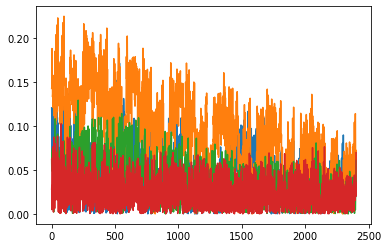

In [156]:
import matplotlib.pyplot as plt
# plt.plot(range(len(t_inputs)), t_targets)
# plt.show()
# 
# t_outputs = qcinput_net(t_inputs)
# plt.plot(range(len(t_inputs)), t_outputs.detach())
# plt.show()
# 
# t_outputs = best_qcinput_net(t_inputs)
# plt.plot(range(len(t_inputs)), t_outputs.detach())
# plt.show()

t_outputs = best_qcinput_net(t_inputs)
diff = (t_outputs-t_targets).abs()
plt.plot(range(len(t_inputs)), diff.detach())
plt.show()




In [157]:
# import libraries

import torch
import numpy as np
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function
import numpy as np 
import math

import shutil
import os
import time
import sys
from pathlib import Path
import functools
from collections import Counter
print = functools.partial(print, flush=True)

# interest_num = [0,1,2,3,4,5,6,7,8,9]
interest_num = [3,6]
img_size = 4
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 32
inference_batch_size = 32
num_f1 = 4
num_f2 = len(interest_num)
# num_f3 = len(interest_num)
init_lr = 0.01


save_to_file = False
if save_to_file:
    sys.stdout = open(save_path+"/log", 'w')

resume_path = ""
training = True
max_epoch = 10


criterion = nn.CrossEntropyLoss()
# criterion = nn.MSELoss()



print("="*100)
print("Training procedure for Quantum Computer:")
print("\tStart at:",time.strftime("%m/%d/%Y %H:%M:%S"))
print("\tProblems and issues, please contact Dr. Weiwen Jiang (wjiang2@nd.edu)")
print("\tEnjoy and Good Luck!")
print("="*100)
print()

Training procedure for Quantum Computer:
	Start at: 09/02/2020 20:29:20
	Problems and issues, please contact Dr. Weiwen Jiang (wjiang2@nd.edu)
	Enjoy and Good Luck!



In [164]:
def modify_target(target):
    for j in range(len(target)):
        for idx in range(len(interest_num)):
            if target[j] == interest_num[idx]:
                target[j] = idx
                break
    
    new_target = torch.zeros(target.shape[0],2)
        
    for i in range(target.shape[0]):        
        if target[i].item() == 0:            
            new_target[i] = torch.tensor([1,0]).clone()     
        else:
            new_target[i] = torch.tensor([0,1]).clone()
               
    return target,new_target

def select_num(dataset,interest_num):
    labels = dataset.targets #get labels
    labels = labels.numpy()
    idx = {}
    for num in interest_num:
        idx[num] = np.where(labels == num)
        
    fin_idx = idx[interest_num[0]]
    for i in range(1,len(interest_num)):           
        
        fin_idx = (np.concatenate((fin_idx[0],idx[interest_num[i]][0])),)
    
    fin_idx = fin_idx[0]    
    
    dataset.targets = labels[fin_idx]
    dataset.data = dataset.data[fin_idx]
    
    # print(dataset.targets.shape)
    
    dataset.targets,_ = modify_target(dataset.targets)
    # print(dataset.targets.shape)
    
    return dataset

def qc_input_trans(dataset):
    dataset.data = dataset.data
    return dataset


class ToQuantumData(object):
    def __call__(self, tensor):        
        data = tensor                
        input_vec = data.view(-1)
        vec_len = input_vec.size()[0]
        input_matrix = torch.zeros(vec_len,vec_len)
        input_matrix[0] = input_vec
        input_matrix = input_matrix.transpose(0,1)        
        u,s,v = np.linalg.svd(input_matrix)    
        output_matrix = torch.tensor(np.dot(u,v))            
        output_data = output_matrix[:,0].view(1,img_size,img_size)
                
        print(output_data)
        unitray_data = output_data.view(-1)
        gate_data = best_qcinput_net(unitray_data).detach()
        output_data = qcgate_to_state(gate_data).view(1,img_size,img_size)        
        print(output_data)
        
        return output_data
                

# convert data to torch.FloatTensor
transform = transforms.Compose([transforms.Resize((img_size,img_size)),
                                transforms.ToTensor(),ToQuantumData()])
# transform = transforms.Compose([transforms.Resize((img_size,img_size)),transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
# choose the training and test datasets
train_data = datasets.MNIST(root='../../pytorch/data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='../../pytorch/data', train=False,
                                  download=True, transform=transform)

train_data = select_num(train_data,interest_num)
test_data =  select_num(test_data,interest_num)

# train_data = qc_input_trans(train_data)

# imshow(torchvision.utils.make_grid(train_data[0][0]))
# 
# sys.exit(0)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=inference_batch_size, 
    num_workers=num_workers, shuffle=True, drop_last=True)


tensor([[[0.0222, 0.2594, 0.2669, 0.0074],
         [0.0074, 0.3039, 0.5115, 0.0074],
         [0.0222, 0.2372, 0.4892, 0.0074],
         [0.0593, 0.3632, 0.2743, 0.0000]]])
tensor([[[0.0362, 0.0060, 0.0913, 0.0153],
         [0.0389, 0.0065, 0.0982, 0.0164],
         [0.0810, 0.0135, 0.2044, 0.0341],
         [0.0871, 0.0145, 0.2198, 0.0367]]])
tensor([[[0.0000, 0.0965, 0.2172, 0.0000],
         [0.0000, 0.4151, 0.3669, 0.0097],
         [0.0145, 0.5310, 0.5407, 0.0676],
         [0.0048, 0.1593, 0.1786, 0.0097]]])
tensor([[[0.0328, 0.0107, 0.0593, 0.0194],
         [0.0100, 0.0033, 0.0181, 0.0059],
         [0.1726, 0.0565, 0.3124, 0.1023],
         [0.0527, 0.0173, 0.0954, 0.0312]]])
tensor([[[0.0000, 0.0407, 0.3121, 0.0204],
         [0.0000, 0.2850, 0.2985, 0.0068],
         [0.0068, 0.5631, 0.6038, 0.0611],
         [0.0000, 0.1425, 0.1560, 0.0068]]])
tensor([[[0.0174, 0.0039, 0.0546, 0.0123],
         [0.0036, 0.0008, 0.0114, 0.0026],
         [0.1462, 0.0329, 0.4577, 0.1029],
 

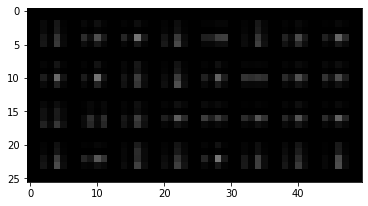

In [165]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
# functions to show an image
from matplotlib import cm


def imshow(img):
    img = img
    npimg = img.numpy()
    
    # print(npimg.shape)
    # print(np.transpose(npimg, (1, 2, 0)))
    # print(np.transpose(npimg, (1, 2, 0)).shape)
    
    plt.imshow(np.transpose(npimg, (1, 2, 0)))    
    plt.show()
    
    
    # image = np.asarray(npimg[0] * 255, np.uint8)    
    # print(npimg[0])
    # # sys.exit(0)
    # # image = np.asarray(npimg[0])
    # im = Image.fromarray(image,mode="L")
    # 
    # im.save("32*32.jpg",cmap="gray") 
    # im = im.resize((4,4))    
    # 
    # for i in range(4):
    #     for j in range(4):
    #         print(im.getpixel((i,j))/255,end=" ")
    #     print()
    # plt.imshow(im,cmap='gray',)
    # 
    # plt.show()
    # im.save("4*4.jpg",cmap="gray") 
    # sys.exit(0)


for batch_idx, (data, target) in enumerate(train_loader):
    torch.set_printoptions(threshold=sys.maxsize)
    print(data.shape)
    print(target)
    imshow(torchvision.utils.make_grid(data))
    break
    
    # # 
    # # 
    # # input_vec = data.view(batch_size,-1)
    # # 
    # # 
    # # sys.exit(0)
    # 
    # input_vec = data.view(-1)
    # vec_len = input_vec.size()[0]
    # input_matrix = torch.zeros(vec_len,vec_len)
    # input_matrix[0] = input_vec
    # input_matrix = input_matrix.transpose(0,1)
    # 
    # u,s,v = np.linalg.svd(input_matrix)    
    # output_matrix = torch.tensor(np.dot(u,v))    
    # 
    # output_data = output_matrix[:,0].view(img_size,img_size)
    # 
    # imshow(torchvision.utils.make_grid(output_data))
    # # print(output_data)
    # 
    # sys.exit(0)    
    # ori_img = data[0][0].numpy()
    # u,s,v = np.linalg.svd(ori_img, full_matrices=True)
    # print(u.shape,s.shape,v.shape)
    # 
    # 
    # 
    # imshow(torchvision.utils.make_grid(data))
    # sys.exit(0)
# 
# # get some random training images
# dataiter = iter(train_loader)
# images, labels = dataiter.next()
# # show images
# imshow(torchvision.utils.make_grid(images))
# # print labels
# print(' '.join('%5s' % filtered_class[labels[j]] for j in range(batch_size)))




In [160]:
from torch.nn.parameter import Parameter
 

class BinarizeF(Function):

    @staticmethod
    def forward(cxt, input):
        output = input.new(input.size())
        output[input >= 0] = 1
        output[input < 0] = -1
        
              
        return output

    @staticmethod
    def backward(cxt, grad_output):
        grad_input = grad_output.clone()
        return grad_input
# aliases
binarize = BinarizeF.apply


class ClipF(Function):

    @staticmethod
    def forward(ctx, input):
        output = input.clone().detach()
        # output = input.new(input.size())
        output[input >= 1] = 1
        output[input <= 0] = 0
        ctx.save_for_backward(input)
        return output

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input >= 1] = 0
        grad_input[input <= 0] = 0
        return grad_input


# aliases
clipfunc = ClipF.apply


class BinaryLinear(nn.Linear):
    
    
    def do_slp_via_th(self,input_ori,w_ori):
        p = input_ori
        d = 4*p*(1-p)
        e = (2*p-1)
        # e_sq = torch.tensor(1)
        w = w_ori
        
        sum_of_sq = (d+e.pow(2)).sum(-1)
        sum_of_sq = sum_of_sq.unsqueeze(-1)        
        sum_of_sq = sum_of_sq.expand(p.shape[0], w.shape[0])
                
        diag_p = torch.diag_embed(e)        
        
        p_w = torch.matmul(w,diag_p)
        
        z_p_w = torch.zeros_like(p_w)        
        shft_p_w = torch.cat((p_w, z_p_w), -1)
        
        sum_of_cross = torch.zeros_like(p_w)
        length = p.shape[1]    
        
        for shft in range(1,length):    
            sum_of_cross += shft_p_w[:,:,0:length]*shft_p_w[:,:,shft:length+shft]

        sum_of_cross = sum_of_cross.sum(-1)
                
        return (sum_of_sq+2*sum_of_cross)/(length**2) 
    
    def forward(self, input):        
        binary_weight = binarize(self.weight)        
        if self.bias is None:
            return self.do_slp_via_th(input,binary_weight)
                      
        else:   
            
            bias_one  = torch.ones(input.shape[0],1)            
            new_input = torch.cat((input, bias_one), -1)            
            bias = clipfunc(self.bias).unsqueeze(1)            
            new_weight = binary_weight            
            new_weight = torch.cat((new_weight,bias),-1)                        
            return self.do_slp_via_th(new_input,new_weight)
            
            
            torch.set_printoptions(edgeitems=64)
            # binary_bias = binarize(self.bias)/float(len(input[0].flatten())+1)
            binary_bias = binarize(self.bias)/float(len(input[0].flatten())+1)
            res = F.linear(input, binary_weight/float(len(input[0].flatten())+1), binary_bias)
            return res

    def reset_parameters(self):
        # Glorot initialization
        in_features, out_features = self.weight.size()
        stdv = math.sqrt(1.5 / (in_features + out_features))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.zero_()

        self.weight.lr_scale = 1. / stdv





class QC_Norm(nn.Module):
    def __init__(self, num_features, momentum=0.1):        
        super(QC_Norm, self).__init__()
        
        self.x_running_rot = Parameter(torch.zeros(num_features),requires_grad=False)        
        self.ang_inc = Parameter(torch.ones(1)*10)
        
        self.momentum = momentum
                
        self.printed = False
        self.x_mean_ancle=0
        self.x_mean_rote = 0
        self.input = 0
        self.output = 0
        
    def forward(self,x,training=True):  
        if not training:
            if not self.printed:
                print("self.ang_inc",self.ang_inc)
                self.printed = True
                    
            x = x.transpose(0,1)
  
            x_ancle = (x*2-1).acos()
            x_final = x_ancle+self.x_running_rot.unsqueeze(-1)
            x_1 = (x_final.cos()+1)/2
                                
            x_1 = x_1.transpose(0,1)
            
        else:
            self.printed = False
            x = x.transpose(0,1)        
            x_sum = x.sum(-1).unsqueeze(-1).expand(x.shape)
            x_lack_sum = x_sum - x    
            x_mean = x_lack_sum/x.shape[-1]
            
            
                    
            x_mean_ancle = (x_mean*2-1).acos()  
            
            ang_inc = self.ang_inc.unsqueeze(-1).expand(x_mean_ancle.shape) 
            # ang_inc = np.pi/2/(x.max(-1)[0].unsqueeze(-1).expand(x_mean_ancle.shape) -x.min(-1)[0].unsqueeze(-1).expand(x_mean_ancle.shape) )
            x_mean_rote = (np.pi/2 - x_mean_ancle)*20 # ang_inc
            
            x_moving_rot = (x_mean_rote.sum(-1)/x.shape[-1])            
            self.x_running_rot[:] = self.momentum * self.x_running_rot + \
                                  (1 - self.momentum) * x_moving_rot
                                                
            x_ancle = (x*2-1).acos()
            x_final = x_ancle+x_mean_rote  
            x_1 = (x_final.cos()+1)/2                                
            x_1 = x_1.transpose(0,1)
      
        return x_1
    
    def reset_parameters(self):
        self.reset_running_stats()
        self.ang_inc.data.zeros_()
        
def print_degree(x,name="x"):
    print(name,x/np.pi*180)
    
    
class QC_Norm_Real(nn.Module):
    def __init__(self,num_features,momentum=0.1):        
        super(QC_Norm_Real, self).__init__()        
        self.x_running_rot = Parameter(torch.zeros(num_features),requires_grad=False)
        self.momentum = momentum
        
        self.x_max = 0
        self.x_min = 0
        # print("Using Normal without real")
        
        
    def forward(self,x,training=True):  
        if not training:
            x = x.transpose(0,1)
            
            x_ancle = (x*2-1).acos()
            # x_final = x_ancle+self.x_running_rot.unsqueeze(-1)  
            x_final = ((x_ancle-self.x_min)/(self.x_max-self.x_min))*np.pi
            
            x_1 = (x_final.cos()+1)/2                                
            x_1 = x_1.transpose(0,1)
            
        else:
            
            x = x.transpose(0,1)        
            x_ancle = (x*2-1).acos()     
            x_rectify_ancle = (x_ancle.max(-1)[0]-x_ancle.min(-1)[0]).unsqueeze(-1).expand(x.shape)                                                                         
            x_final = ((x_ancle-x_ancle.min(-1)[0].unsqueeze(-1))/(x_rectify_ancle))*np.pi
            
            x_moving_rot = x_final - x_ancle
            
            x_moving_rot_mean = x_moving_rot.sum(-1)/x.shape[-1] 
            self.x_running_rot[:] = self.momentum * self.x_running_rot + \
                                  (1 - self.momentum) * x_moving_rot_mean      
            
            self.x_max = self.momentum * x_ancle.max(-1)[0].unsqueeze(-1) + \
                                    (1 - self.momentum) * self.x_max
            self.x_min = self.momentum * x_ancle.min(-1)[0].unsqueeze(-1) + \
                                    (1 - self.momentum) * self.x_min
            
            x_1 = (x_final.cos()+1)/2                                
            x_1 = x_1.transpose(0,1)
            
            
        return x_1


class QC_Norm_Real_Correction(nn.Module):
    def __init__(self,num_features,momentum=0.1):        
        super(QC_Norm_Real_Correction, self).__init__()        
        self.x_running_rot = Parameter(torch.zeros(num_features),requires_grad=False)
        self.momentum = momentum
        
    def forward(self,x,training=True):  
        if not training:
            x = x.transpose(0,1)
            
            x_ancle = (x*2-1).acos()
            x_final = x_ancle+self.x_running_rot.unsqueeze(-1)  
            x_1 = (x_final.cos()+1)/2                                
            x_1 = x_1.transpose(0,1)
            
        else:            
            
            x = x.transpose(0,1)                    
            x_ancle = (x*2-1).acos()                        
            x_moving_rot = -1*(x_ancle.min(-1)[0])
            
            self.x_running_rot[:] = self.momentum * self.x_running_rot + \
                                  (1 - self.momentum) * x_moving_rot                                                    
            x_final = x_ancle+x_moving_rot.unsqueeze(-1)                                    
            x_1 = (x_final.cos()+1)/2                                
            x_1 = x_1.transpose(0,1)
            
            
        
        return x_1

class QC_Norm_Correction(nn.Module):
    def __init__(self,num_features,momentum=0.1):        
        super(QC_Norm_Correction, self).__init__()        
        self.x_running_rot = Parameter(torch.zeros(num_features),requires_grad=False)
        self.momentum = momentum
        
    def forward(self,x,training=True):  
        if not training:
            x = x.transpose(0,1)
            
            x_ancle = (x*2-1).acos()
            x_final = x_ancle+self.x_running_rot.unsqueeze(-1)  
            x_1 = (x_final.cos()+1)/2                                
            x_1 = x_1.transpose(0,1)
            
        else:
            x = x.transpose(0,1)        
            x_sum = x.sum(-1).unsqueeze(-1).expand(x.shape)                
            x_mean = x_sum/x.shape[-1]
                                
            x_mean_ancle = (x_mean*2-1).acos()    
            x_mean_rote = (np.pi/2 - x_mean_ancle) 
            
            x_moving_rot = (x_mean_rote.sum(-1)/x.shape[-1])
            self.x_running_rot[:] = self.momentum * self.x_running_rot + \
                                  (1 - self.momentum) * x_moving_rot                                        
            x_ancle = (x*2-1).acos()
            x_final = x_ancle+x_mean_rote  
            x_1 = (x_final.cos()+1)/2                                
            x_1 = x_1.transpose(0,1)
        
        return x_1

## Define the NN architecture
class Net(nn.Module):    
    def __init__(self):
        super(Net, self).__init__()
        
        
        
        self.fc1 = BinaryLinear(img_size*img_size,num_f1,bias=False)
        self.fc2 = BinaryLinear(num_f1,num_f2,bias=False)
        # self.fc3 = BinaryLinear(num_f2,num_f3,bias=False)
        # # 
        # self.qc1 = QC_Norm(num_features=num_f1)
        # self.qc2 = QC_Norm(num_features=num_f2)
        # self.qc3 = QC_Norm(num_features=num_f3)

        self.qc1a = QC_Norm_Correction(num_features=num_f1)
        self.qc2a = QC_Norm_Correction(num_features=num_f2)
        # self.qc3a = QC_Norm_Correction(num_features=num_f3)
        # 
        # 
        self.qc1 = QC_Norm_Real(num_features=num_f1)
        self.qc2 = QC_Norm_Real(num_features=num_f2)
        # self.qc3 = QC_Norm_Real(num_features=num_f3)


        # self.qc1a = QC_Norm_Real_Correction(num_features=num_f1)
        # self.qc2a = QC_Norm_Real_Correction(num_features=num_f2)
        # self.qc3a = QC_Norm_Real_Correction(num_features=num_f3)
        # 
    def forward(self, x, training=1):        
        x = x.view(-1, img_size * img_size)
        
        if training == 1:
            # x = binarize(x-0.0001)
            # x = (x+1)/2
            # 
            
            
            # x = self.fc1(x)        
            # x = self.fc2(x)                           
            # x = self.fc3(x)
            # 
            
            x = self.fc1(x)        
            x = self.qc2a(self.fc2(x))                           
            # x = self.qc3(self.qc3a(self.fc3(x)))
            # 
            # x = self.qc1((self.fc1(x)))        
            # x = self.qc2((self.fc2(x)))                           
            # x = self.qc3((self.fc3(x)))
            # 
        elif training == 2:
            
            # x = binarize(x-0.0001)
            # x = (x+1)/2
            
            torch.set_printoptions(profile="full")
            
            print(binarize(self.fc1.weight))
            
            
                        
            y = x[0]*binarize(self.fc1.weight[0])
            print(y.sum()/y.shape[0])
            torch.set_printoptions(profile="default")
            x = self.fc1(x)            
            print(x)
        else:
            # x = self.qc1(self.fc1(x),training=False)
            # x = self.qc2(self.fc2(x),training=False)
            # x = self.qc3(self.fc3(x),training=False)
            # 
            
            # x = binarize(x-0.0001)
            # x = (x+1)/2
            # 
            x = self.fc1(x)                
            x = self.qc2a(self.fc2(x),training=False)            
            # x = self.qc3(self.qc3a(self.fc3(x),training=False),training=False)
            # 
            # 
            # x = self.fc1(x)        
            # x = self.fc2(x)                           
            # x = self.fc3(x)
        return x




def train(epoch):
    model.train()
    correct = 0
    epoch_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        target,new_target = modify_target(target)
        # 
        # data = (data-data.min())/(data.max()-data.min())
        # data = (binarize(data-0.5)+1)/2
        # 
        
        
        
        data, target = data.to(device), target.to(device)        
        optimizer.zero_grad()
        output = model(data,True)
        
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()    
        
        loss = criterion(output, target)
        epoch_loss.append(loss.item())
        loss.backward()
        
        optimizer.step()
                
        if batch_idx % 100 == 0:        
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAccuracy: {}/{} ({:.2f}%)'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss, correct, (batch_idx+1) * len(data),
                100. * float(correct) / float(((batch_idx+1) * len(data)) )))                
    print("-"*20,"training done, loss","-"*20)
    print("Training Set: Average loss: {}".format(round(sum(epoch_loss)/len(epoch_loss),6)))
    
accur=[]
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        target,new_target = modify_target(target)
        
        # 
        # data = (data-data.min())/(data.max()-data.min())
        # data = (binarize(data-0.5)+1)/2
        
        data, target = data.to(device), target.to(device)
        
        # print("Debug")
        # output = model(data,2)
        # 
        # sys.exit(0)
        # data, target = Variable(data, volatile=True), Variable(target)
        output = model(data,False)
        test_loss += criterion(output, target) # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
    
    a=100.*correct / len(test_loader.dataset)
    accur.append(a)  
    test_loss /= len(test_loader.dataset)
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * float(correct) / float(len(test_loader.dataset))))
    
    return float(correct) / len(test_loader.dataset)




#Training



model = Net().to(device)
print("="*10,"Model Info","="*10)
print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=init_lr)
# optimizer = torch.optim.Adam([
#                 {'params': model.fc1.parameters()},
#                 {'params': model.fc2.parameters()},
#                 {'params': model.fc3.parameters()},
#                 {'params': model.qc1.parameters(), 'lr': 1},
#                 {'params': model.qc2.parameters(), 'lr': 1},
#                 {'params': model.qc3.parameters(), 'lr': 1},
#             ], lr=0.1)

# optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

# optimizer = torch.optim.SGD([
#                 {'params': model.fc1.parameters()},
#                 {'params': model.fc2.parameters()},
#                 {'params': model.fc3.parameters()},
#                 {'params': model.qc1.parameters(), 'lr': 1},
#                 {'params': model.qc2.parameters(), 'lr': 1},
#                 {'params': model.qc3.parameters(), 'lr': 1},
#             ], lr=0.1, momentum=0.9)
# 
# scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, \
#         base_lr=[1e-1,1e-1,1e-1,1,1,1], \
#         max_lr=[1e-3,1e-3,1e-3,1e-2,1e-2,1e-2], \
#         step_size_up=100
#         )

milestones = [3, 5, 8]
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones, gamma=0.1)

# 
# 
# test()
# 
# 

========== Model Info ==========
Net(
  (fc1): BinaryLinear(in_features=16, out_features=4, bias=False)
  (fc2): BinaryLinear(in_features=4, out_features=2, bias=False)
  (qc1a): QC_Norm_Correction()
  (qc2a): QC_Norm_Correction()
  (qc1): QC_Norm_Real()
  (qc2): QC_Norm_Real()
)


In [161]:
if os.path.isfile(resume_path):
    print("=> loading checkpoint from '{}'<=".format(resume_path))
    checkpoint = torch.load(resume_path, map_location=device)
    epoch_init,acc = checkpoint["epoch"],checkpoint["acc"]
    model.load_state_dict(checkpoint["state_dict"])
    scheduler.load_state_dict(checkpoint["scheduler"])    
    scheduler.milestones = Counter(milestones)
    optimizer.load_state_dict(checkpoint["optimizer"])
else:
    epoch_init,acc = 0,0





if training:
    for epoch in range(epoch_init, max_epoch + 1):
        print("="*20,epoch,"epoch","="*20)  
        print("Epoch Start at:",time.strftime("%m/%d/%Y %H:%M:%S"))        

        print("-"*20,"learning rates","-"*20)
        for param_group in optimizer.param_groups:
            print(param_group['lr'],end=",")
        print()    
        
        print("-"*20,"training","-"*20)
        print("Trainign Start at:",time.strftime("%m/%d/%Y %H:%M:%S"))
        train(epoch)
        print("Trainign End at:",time.strftime("%m/%d/%Y %H:%M:%S"))
        print("-"*60)
        
        print()
        
        
        
        
        
        print("-"*20,"testing","-"*20)
        print("Testing Start at:",time.strftime("%m/%d/%Y %H:%M:%S"))        
        cur_acc = test()
        print("Testing End at:",time.strftime("%m/%d/%Y %H:%M:%S"))
        print("-"*60)
        print()
        
        scheduler.step()
        
        is_best = False
        if cur_acc > acc:
            is_best = True
            acc=cur_acc
        
        print("Best accuracy: {}; Current accuracy {}. Checkpointing".format(acc,cur_acc))
        save_checkpoint({
          'epoch': epoch + 1,
          'acc': acc, 
          'state_dict': model.state_dict(),      
          'optimizer' : optimizer.state_dict(),
           'scheduler': scheduler.state_dict(),
        }, is_best, save_path, 'checkpoint_{}_{}.pth.tar'.format(epoch,round(cur_acc,4)))
        print("Epoch End at:",time.strftime("%m/%d/%Y %H:%M:%S"))
        print("="*60)
        print()        
else:    
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, 
        num_workers=num_workers, shuffle=True, drop_last=True)
    test()


==================== 0 epoch ====================
Epoch Start at: 09/02/2020 20:29:22
-------------------- learning rates --------------------
0.01,
-------------------- training --------------------
Trainign Start at: 09/02/2020 20:29:22
Train Epoch: 0 [0/12049 (0%)]	Loss: 0.687131	Accuracy: 32/32 (100.00%)
Train Epoch: 0 [3200/12049 (27%)]	Loss: 0.663223	Accuracy: 3097/3232 (95.82%)
Train Epoch: 0 [6400/12049 (53%)]	Loss: 0.662204	Accuracy: 6146/6432 (95.55%)
Train Epoch: 0 [9600/12049 (80%)]	Loss: 0.658946	Accuracy: 9210/9632 (95.62%)
-------------------- training done, loss --------------------
Training Set: Average loss: 0.660859
Trainign End at: 09/02/2020 20:30:01
------------------------------------------------------------

-------------------- testing --------------------
Testing Start at: 09/02/2020 20:30:01
Test set: Average loss: 0.0204, Accuracy: 1883/1968 (95.68%)
Testing End at: 09/02/2020 20:30:08
------------------------------------------------------------

Best accura

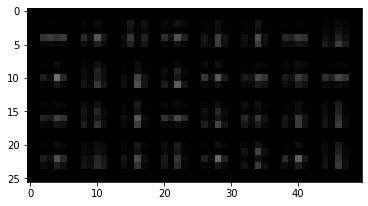

tensor([[[0.0102, 0.0120, 0.0099, 0.0116],
         [0.0015, 0.0017, 0.0014, 0.0017],
         [0.1945, 0.2279, 0.1883, 0.2206],
         [0.0278, 0.0326, 0.0269, 0.0315]]])
tensor([[ 2.4243e-02, -2.8395e-02, -2.3465e-02, -2.7485e-02, -3.4655e-03,
         -4.0591e-03, -3.3544e-03, -3.9290e-03, -4.6121e-01, -5.4022e-01,
         -4.4643e-01, -5.2290e-01, -6.5931e-02, -7.7225e-02, -6.3817e-02,
         -7.4749e-02],
        [ 2.8395e-02,  9.9921e-01, -6.5053e-04, -7.6197e-04, -9.6074e-05,
         -1.1253e-04, -9.2994e-05, -1.0892e-04, -1.2786e-02, -1.4976e-02,
         -1.2376e-02, -1.4496e-02, -1.8278e-03, -2.1409e-03, -1.7692e-03,
         -2.0723e-03],
        [ 2.3465e-02, -6.5053e-04,  9.9946e-01, -6.2968e-04, -7.9394e-05,
         -9.2994e-05, -7.6849e-05, -9.0013e-05, -1.0566e-02, -1.2376e-02,
         -1.0228e-02, -1.1980e-02, -1.5105e-03, -1.7692e-03, -1.4621e-03,
         -1.7125e-03],
        [ 2.7485e-02, -7.6197e-04, -6.2968e-04,  9.9926e-01, -9.2994e-05,
         -1.0892e

In [162]:
for data, target in test_loader:
    imshow(torchvision.utils.make_grid(data))
    
    
    print(data[0])
    data = data[0]
    input_vec = data.view(-1)
    vec_len = input_vec.size()[0]
    input_matrix = torch.zeros(vec_len,vec_len)
    input_matrix[0] = input_vec
    input_matrix = input_matrix.transpose(0,1)        
    u,s,v = np.linalg.svd(input_matrix)    
    output_matrix = torch.tensor(np.dot(u,v))            
    output_data = output_matrix[:,0].view(1,img_size,img_size)
    
    print(output_matrix)
    print(output_matrix.shape)
    break